In [3]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from ipywidgets import interactive
from IPython.display import display
from matplotlib import animation
# from sympy.abc import x, y, t,a,b,n

## Schrodinger Equation in One Dimension
Time independent Schrodinger equation is given by
$$ -\frac{d^2\psi(x)}{dx^2} + \frac{2m}{\hbar^2}(E-V)\psi(x)= 0$$
where $V(x)$ is the potential energy function and $E$ is the energy.

## Free Particle
For this, V = 0. The Schroedinger equation becomes:
$$ \frac{d^2\psi(x)}{dx^2} = E\frac{2m}{\hbar^2} \psi(x)$$
Let $E\frac{2m}{\hbar^2} = k^2$ then:
$$ \frac{d^2\psi(x)}{dx^2} = k^2\psi(x)$$

To solve this, we define:
$$ y = \psi(x)$$
$$y_1 = y^{'} $$
then we get:
$$ y_2 = k^2y$$
$$y_1^{'} = y_2 = k^2y$$

In [20]:
def vector_field(w,t,p):
    """
    Returns the value of the vector field at the point (x, y, t)
    """
    y, y1 = w
    k = p
    return np.array([
        y1,
        -k**2*y
    ])

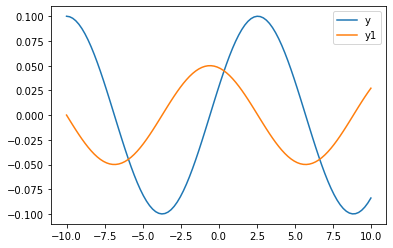

In [21]:
from scipy.integrate import odeint
k = 0.5
t = np.linspace(-10, 10, 100)
y0 = [0.1, 0]
w = odeint(vector_field, y0, t, args=(k,))

w1 = w[:,0]
w2 = w[:,1]
plt.plot(t,w1,label='y')
plt.plot(t,w2,label='y1')
plt.legend()

## Infinite Potential Well
The solution of infinite potential well is given by:
$$\psi_n(x) = \sqrt{\frac{2}{a}}\sin(\frac{n\pi x}{a})$$
a = length of the well <br>
n = number of states

In [6]:

def wave_function(x, a, n):
    alpha = np.sin(n*np.pi*x/a)
    return np.sqrt((2/a))*alpha

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
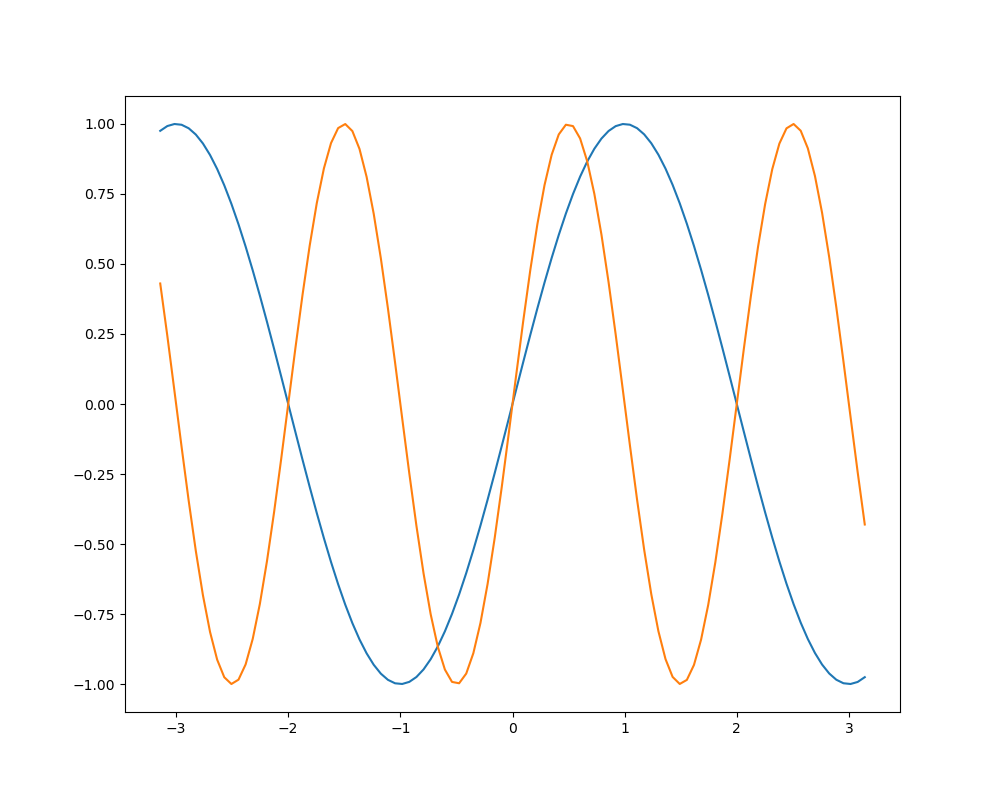

In [7]:
a=2
plt.figure(figsize=(10,8))
t = np.linspace(-1*np.pi,1*np.pi,100)
for i in range(1,3):
    plt.plot(t,wave_function(t, a, i))
plt.show()


### Plotting the trandedental equation in finite potenial well

The equation is:
$$\tan{z} = \sqrt{(\frac{z_0}{z})^2-1}$$
here 
$$z_0 = \frac{a}{\hbar}\sqrt{2mV_0}$$

<ipython-input-3-7a4785a199ab>:4: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((z_0/z)**2-1)
<ipython-input-3-7a4785a199ab>:4: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((z_0/z)**2-1)
<ipython-input-3-7a4785a199ab>:4: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((z_0/z)**2-1)


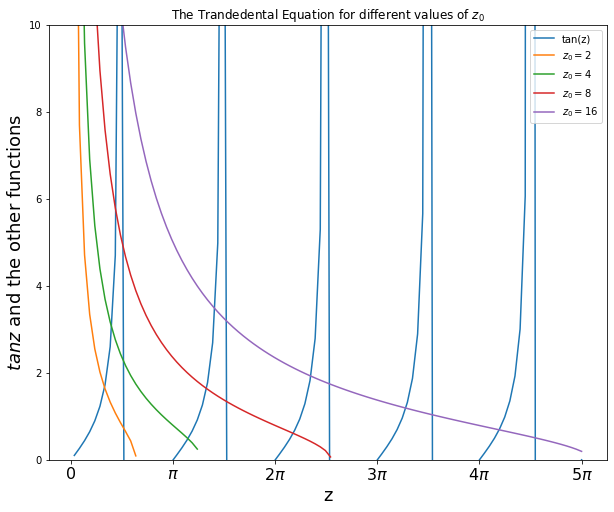

In [3]:
# %matplotlib widget

def right_equation(z_0,z):
    return np.sqrt((z_0/z)**2-1)

t = np.linspace(0.1,5*np.pi,100)
plt.figure(figsize=(10,8))
plt.title('The Trandedental Equation for different values of $z_0$')
plt.plot(t, np.tan(t), label='tan(z)')
for i in [2,4,8,16]:
    y = right_equation(i,t)
    plt.plot(t, y, label='$z_0=%d$'%i)

plt.legend()
plt.xlabel('z', fontdict={'fontsize':18})
plt.ylabel('$\ttan{z}$ and the other functions', fontdict={'fontsize':18})
plt.xticks(fontsize=16,ticks=[0,np.pi,2*np.pi,3*np.pi,4*np.pi, 5*np.pi],
 labels=['0','$\pi$','2$\pi$','3$\pi$','4$\pi$','5$\pi$'])
plt.ylim(0,10);